In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge
from sklearn.exceptions import ConvergenceWarning
from pmdarima import auto_arima
import warnings
import os

# Configuración
warnings.simplefilter("ignore", ConvergenceWarning)
warnings.simplefilter("ignore", FutureWarning)

# Crear carpeta para los gráficos
os.makedirs("graficos_batch_separado", exist_ok=True)

# Productos problemáticos
productos_problematicos = [20001, 20002, 20003, 20004, 20005, 20006, 20007, 20012, 20032, 20127]

# 1. Cargar dataset
df = pd.read_csv("datos_finales.txt", sep="\t")
df["periodo"] = pd.to_datetime(df["periodo"])
df = df[df["product_id"].isin(productos_problematicos)]

# 2. Agrupar por producto y sumar TN
df_prod = df.groupby(["product_id", "periodo"])["tn"].sum().reset_index()

# 3. Crear resultados
resultados = []

# 4. Loop por producto
for prod in productos_problematicos:
    df_p = df_prod[df_prod["product_id"] == prod].sort_values("periodo")
    df_p = df_p[df_p["periodo"] < "2020-02-01"]

    serie = df_p.set_index("periodo")["tn"]

    # Filtro si hay menos de 3 valores positivos
    serie_pos = serie[serie > 0]
    if len(serie_pos) < 3:
        pred = serie_pos.mean() if len(serie_pos) > 0 else 0
        metodo = "fallback_media"
    else:
        pred = None
        metodo = None

        # 1° Intento: Ridge
        try:
            serie_r = serie.fillna(0)
            X = np.arange(len(serie_r)).reshape(-1, 1)
            y = serie_r.values
            model = Ridge()
            model.fit(X, y)
            pred = model.predict([[len(X)]])[0]
            metodo = "ridge"
        except Exception:
            pass

        # 2° Intento: AutoARIMA
        if pred is None:
            try:
                modelo_arima = auto_arima(serie, suppress_warnings=True, error_action="ignore")
                pred = modelo_arima.predict(n_periods=1)[0]
                metodo = "autoarima"
            except Exception:
                pass

        # Fallback si no funcionó nada
        if pred is None:
            pred = serie_pos.tail(3).mean()
            metodo = "fallback_media"

    # Guardar resultado
    resultados.append({
        "product_id": prod,
        "periodo": "2020-02-01",
        "tn_predicho": pred,
        "metodo": metodo
    })

    # Gráfico
    plt.figure(figsize=(8, 4))
    plt.plot(serie.index, serie.values, marker="o", label="Histórico")
    plt.axvline(pd.to_datetime("2020-02-01"), color="gray", linestyle="--", label="Feb 2020")
    plt.scatter(pd.to_datetime("2020-02-01"), pred, color="red", label=f"Predicción ({metodo})")
    plt.title(f"Producto {prod}")
    plt.xlabel("Periodo")
    plt.ylabel("TN")
    plt.legend()
    plt.tight_layout()
    plt.savefig(f"graficos_batch_separado/grafico_{prod}.png")
    plt.close()

# 5. Exportar resultados
df_resultado = pd.DataFrame(resultados)
df_resultado.to_csv("predicciones_batch_separado.csv", index=False)

print("✅ Predicciones guardadas en predicciones_batch_separado.csv")
print("🖼️  Gráficos guardados en carpeta 'graficos_batch_separado'")


✅ Predicciones guardadas en predicciones_batch_separado.csv
🖼️  Gráficos guardados en carpeta 'graficos_batch_separado'


✅ Collage guardado como collage_batch_separado.png


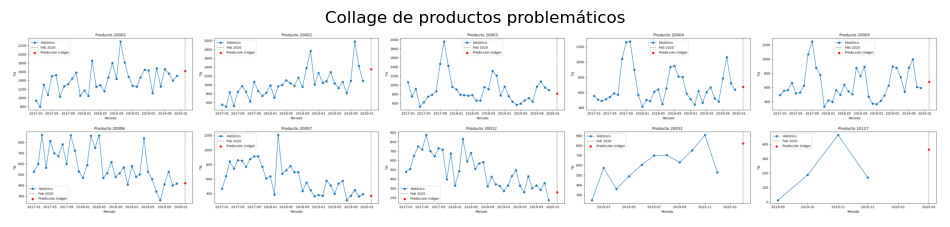

In [2]:
from PIL import Image
import os

# Ruta de carpeta con los gráficos
carpeta = "graficos_batch_separado"

# Obtener todos los PNG
archivos = sorted([f for f in os.listdir(carpeta) if f.endswith(".png")])
imagenes = [Image.open(os.path.join(carpeta, f)) for f in archivos]

# Parámetros del collage
ancho, alto = imagenes[0].size
columnas = 5
filas = (len(imagenes) + columnas - 1) // columnas

# Crear imagen final
collage = Image.new("RGB", (ancho * columnas, alto * filas), color=(255, 255, 255))

# Pegar cada imagen en su lugar
for i, img in enumerate(imagenes):
    x = (i % columnas) * ancho
    y = (i // columnas) * alto
    collage.paste(img, (x, y))

# Guardar el collage
collage.save("collage_batch_separado.png")
print("✅ Collage guardado como collage_batch_separado.png")
collage.show()
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.imshow(collage)
plt.axis("off")
plt.title("Collage de productos problemáticos")
plt.show()


✅ Predicciones guardadas en predicciones_batch_separadoarima.csv
🖼️  Gráficos guardados en carpeta 'graficos_batch_separadoarima'
✅ Collage guardado como collage_batch_separadoarima.png


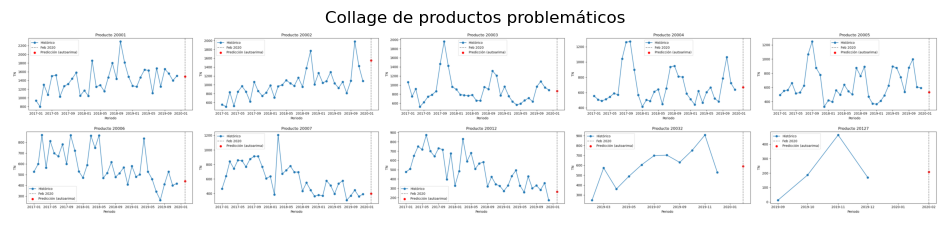

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge
from sklearn.exceptions import ConvergenceWarning
from pmdarima import auto_arima
import warnings
import os

# Configuración
warnings.simplefilter("ignore", ConvergenceWarning)
warnings.simplefilter("ignore", FutureWarning)

# Crear carpeta para los gráficos
os.makedirs("graficos_batch_separado", exist_ok=True)

# Productos problemáticos
productos_problematicos = [20001, 20002, 20003, 20004, 20005, 20006, 20007, 20012, 20032, 20127]

# 1. Cargar dataset
df = pd.read_csv("datos_finales.txt", sep="\t")
df["periodo"] = pd.to_datetime(df["periodo"])
df = df[df["product_id"].isin(productos_problematicos)]

# 2. Agrupar por producto y sumar TN
df_prod = df.groupby(["product_id", "periodo"])["tn"].sum().reset_index()

# 3. Crear resultados
resultados = []

# 4. Loop por producto
for prod in productos_problematicos:
    df_p = df_prod[df_prod["product_id"] == prod].sort_values("periodo")
    df_p = df_p[df_p["periodo"] < "2020-02-01"]

    serie = df_p.set_index("periodo")["tn"]

    # Filtro si hay menos de 3 valores positivos
    serie_pos = serie[serie > 0]
    if len(serie_pos) < 3:
        pred = serie_pos.mean() if len(serie_pos) > 0 else 0
        metodo = "fallback_media"
    else:
        pred = None
        metodo = None

        # 2° Intento: AutoARIMA
        if pred is None:
            try:
                modelo_arima = auto_arima(serie, suppress_warnings=True, error_action="ignore")
                pred = modelo_arima.predict(n_periods=1)[0]
                metodo = "autoarima"
            except Exception:
                pass

        # Fallback si no funcionó nada
        if pred is None:
            pred = serie_pos.tail(3).mean()
            metodo = "fallback_media"

    # Guardar resultado
    resultados.append({
        "product_id": prod,
        "periodo": "2020-02-01",
        "tn_predicho": pred,
        "metodo": metodo
    })

    # Gráfico
    plt.figure(figsize=(8, 4))
    plt.plot(serie.index, serie.values, marker="o", label="Histórico")
    plt.axvline(pd.to_datetime("2020-02-01"), color="gray", linestyle="--", label="Feb 2020")
    plt.scatter(pd.to_datetime("2020-02-01"), pred, color="red", label=f"Predicción ({metodo})")
    plt.title(f"Producto {prod}")
    plt.xlabel("Periodo")
    plt.ylabel("TN")
    plt.legend()
    plt.tight_layout()
    plt.savefig(f"graficos_batch_separado/grafico_{prod}.png")
    plt.close()

# 5. Exportar resultados
df_resultado = pd.DataFrame(resultados)
df_resultado.to_csv("predicciones_batch_separadoarima.csv", index=False)

print("✅ Predicciones guardadas en predicciones_batch_separadoarima.csv")
print("🖼️  Gráficos guardados en carpeta 'graficos_batch_separadoarima'")

from PIL import Image
import os

# Ruta de carpeta con los gráficos
carpeta = "graficos_batch_separado"

# Obtener todos los PNG
archivos = sorted([f for f in os.listdir(carpeta) if f.endswith(".png")])
imagenes = [Image.open(os.path.join(carpeta, f)) for f in archivos]

# Parámetros del collage
ancho, alto = imagenes[0].size
columnas = 5
filas = (len(imagenes) + columnas - 1) // columnas

# Crear imagen final
collage = Image.new("RGB", (ancho * columnas, alto * filas), color=(255, 255, 255))

# Pegar cada imagen en su lugar
for i, img in enumerate(imagenes):
    x = (i % columnas) * ancho
    y = (i // columnas) * alto
    collage.paste(img, (x, y))

# Guardar el collage
collage.save("collage_batch_separadoarima.png")
print("✅ Collage guardado como collage_batch_separadoarima.png")
collage.show()
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.imshow(collage)
plt.axis("off")
plt.title("Collage de productos problemáticos")
plt.show()


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge
from sklearn.exceptions import ConvergenceWarning
from pmdarima import auto_arima
from PIL import Image
import warnings
import os

# Configuración
warnings.simplefilter("ignore", ConvergenceWarning)
warnings.simplefilter("ignore", FutureWarning)
os.makedirs("graficos_batch_separado", exist_ok=True)

# Productos problemáticos
productos_problematicos = [20001, 20002, 20003, 20004, 20005,
                           20006, 20007, 20012, 20032, 20127]

# Cargar dataset
df = pd.read_csv("datos_finales.txt", sep="\t")
df["periodo"] = pd.to_datetime(df["periodo"])
df = df[df["product_id"].isin(productos_problematicos)]
df_prod = df.groupby(["product_id", "periodo"])["tn"].sum().reset_index()

# Predicciones
resultados = []

for prod in productos_problematicos:
    df_p = df_prod[df_prod["product_id"] == prod].sort_values("periodo")
    df_p = df_p[df_p["periodo"] < "2020-02-01"]
    serie = df_p.set_index("periodo")["tn"]

    pred = None
    metodo = None
    zona = None
    nivel_61 = nivel_50 = nivel_38 = None

    serie_pos = serie[serie > 0]
    if len(serie_pos) < 3:
        pred = serie_pos.mean() if len(serie_pos) > 0 else 0
        metodo = "fallback_media"
    else:
        try:
            modelo_arima = auto_arima(serie, suppress_warnings=True, error_action="ignore")
            pred = modelo_arima.predict(n_periods=1)[0]
            metodo = "autoarima"
        except Exception:
            pass

        if pred is None:
            try:
                serie_r = serie.fillna(0)
                X = np.arange(len(serie_r)).reshape(-1, 1)
                y = serie_r.values
                model = Ridge()
                model.fit(X, y)
                pred = model.predict([[len(X)]])[0]
                metodo = "ridge"
            except Exception:
                pass

        if pred is None:
            pred = serie_pos.tail(3).mean()
            metodo = "fallback_media"

    # Fibonacci
    max_hist = serie.max()
    min_hist = serie.min()
    if max_hist != min_hist:
        nivel_61 = max_hist - 0.618 * (max_hist - min_hist)
        nivel_50 = max_hist - 0.5 * (max_hist - min_hist)
        nivel_38 = max_hist - 0.382 * (max_hist - min_hist)

        if pred < nivel_61:
            zona = "zona baja (Fibo < 61.8%)"
        elif pred < nivel_50:
            zona = "zona media-baja (50-61.8%)"
        elif pred < nivel_38:
            zona = "zona media-alta (38.2-50%)"
        else:
            zona = "zona alta (Fibo > 38.2%)"
    else:
        zona = "sin rango Fibo"

    resultados.append({
        "product_id": prod,
        "periodo": "2020-02-01",
        "tn_predicho": pred,
        "metodo": metodo,
        "zona_fibo": zona
    })

    # Gráfico
    plt.figure(figsize=(10, 5))
    plt.plot(serie.index, serie.values, marker="o", label="Histórico")
    plt.axvline(pd.to_datetime("2020-02-01"), color="gray", linestyle="--", label="Feb 2020")
    plt.scatter(pd.to_datetime("2020-02-01"), pred, color="red", label=f"Pred ({metodo})")

    if max_hist != min_hist:
        plt.axhspan(min_hist, nivel_61, facecolor="#f0f0ff", alpha=0.4, label="Zona baja")
        plt.axhspan(nivel_61, nivel_50, facecolor="#d0f0d0", alpha=0.4, label="Zona media-baja")
        plt.axhspan(nivel_50, nivel_38, facecolor="#fff0b0", alpha=0.4, label="Zona media-alta")
        plt.axhspan(nivel_38, max_hist, facecolor="#ffe0e0", alpha=0.4, label="Zona alta")

        plt.axhline(nivel_61, color="blue", linestyle="--", linewidth=1)
        plt.text(serie.index.min(), nivel_61, "61.8%", color="blue", va="bottom")
        plt.axhline(nivel_50, color="green", linestyle="--", linewidth=1)
        plt.text(serie.index.min(), nivel_50, "50%", color="green", va="bottom")
        plt.axhline(nivel_38, color="orange", linestyle="--", linewidth=1)
        plt.text(serie.index.min(), nivel_38, "38.2%", color="orange", va="bottom")

    plt.title(f"Producto {prod} - {zona}")
    plt.xlabel("Periodo")
    plt.ylabel("TN")
    plt.legend()
    plt.tight_layout()
    plt.savefig(f"graficos_batch_separado/grafico_{prod}.png")
    plt.close()

# Exportar CSV
df_resultado = pd.DataFrame(resultados)
df_resultado.to_csv("predicciones_batch_separado.csv", index=False)
print("✅ Predicciones guardadas en predicciones_batch_separado.csv")

# Generar collage
archivos = sorted([f for f in os.listdir("graficos_batch_separado") if f.endswith(".png")])
imagenes = [Image.open(os.path.join("graficos_batch_separado", f)) for f in archivos]
ancho, alto = imagenes[0].size
columnas = 5
filas = (len(imagenes) + columnas - 1) // columnas
collage = Image.new("RGB", (ancho * columnas, alto * filas), color=(255, 255, 255))

for i, img in enumerate(imagenes):
    x = (i % columnas) * ancho
    y = (i // columnas) * alto
    collage.paste(img, (x, y))

collage.save("collage_batch_separado.png")
print("🖼️  Collage guardado como collage_batch_separado.png")

# Mostrar collage
collage.show()


✅ Predicciones guardadas en predicciones_batch_separado.csv
🖼️  Collage guardado como collage_batch_separado.png


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import os
from PIL import Image

# Crear carpeta para guardar gráficos
os.makedirs("graficos_febrero_fibo", exist_ok=True)

# Lista de productos problemáticos
productos = [20001, 20002, 20003, 20004, 20005,
             20006, 20007, 20012, 20032, 20127]

# Cargar datos
df = pd.read_csv("datos_finales.txt", sep="\t")  # 📍 adaptá si está en otra ruta
df["periodo"] = pd.to_datetime(df["periodo"])
df = df[df["product_id"].isin(productos)]

# Filtrar febreros
df_feb = df[df["periodo"].dt.month == 2].copy()
df_feb["anio"] = df_feb["periodo"].dt.year

# Agrupar por producto y año
df_group = df_feb.groupby(["product_id", "anio"])["tn"].sum().reset_index()

resultados = []

for prod in productos:
    df_p = df_group[df_group["product_id"] == prod]
    if len(df_p) < 2:
        continue

    X = df_p["anio"].values.reshape(-1, 1)
    y = df_p["tn"].values
    modelo = LinearRegression()
    modelo.fit(X, y)
    pred = modelo.predict([[2020]])[0]

    # Alternativa: delta promedio
    df_p_sorted = df_p.sort_values("anio")
    deltas = df_p_sorted["tn"].diff().dropna().values
    pred_delta = df_p_sorted["tn"].values[-1] + deltas.mean() if len(deltas) > 0 else df_p_sorted["tn"].values[-1]

    # Fibonacci
    max_hist = y.max()
    min_hist = y.min()
    zona = "sin rango Fibo"
    if max_hist != min_hist:
        nivel_61 = max_hist - 0.618 * (max_hist - min_hist)
        nivel_50 = max_hist - 0.5 * (max_hist - min_hist)
        nivel_38 = max_hist - 0.382 * (max_hist - min_hist)
        if pred < nivel_61:
            zona = "zona baja (Fibo < 61.8%)"
        elif pred < nivel_50:
            zona = "zona media-baja (50-61.8%)"
        elif pred < nivel_38:
            zona = "zona media-alta (38.2-50%)"
        else:
            zona = "zona alta (Fibo > 38.2%)"

    resultados.append({
        "product_id": prod,
        "periodo": "2020-02-01",
        "tn_predicho_regresion": pred,
        "tn_predicho_delta": pred_delta,
        "zona_fibo": zona
    })

    # Gráfico
    plt.figure(figsize=(10, 5))
    plt.plot(df_p["anio"], df_p["tn"], marker="o", label="Febreros históricos")
    plt.axvline(2020, color="gray", linestyle="--", label="2020")
    plt.scatter(2020, pred, color="red", label="Pred (Regresión)")
    plt.scatter(2020, pred_delta, color="green", label="Pred (Delta)")

    if max_hist != min_hist:
        plt.axhspan(min_hist, nivel_61, facecolor="#f0f0ff", alpha=0.4, label="Zona baja")
        plt.axhspan(nivel_61, nivel_50, facecolor="#d0f0d0", alpha=0.4, label="Zona media-baja")
        plt.axhspan(nivel_50, nivel_38, facecolor="#fff0b0", alpha=0.4, label="Zona media-alta")
        plt.axhspan(nivel_38, max_hist, facecolor="#ffe0e0", alpha=0.4, label="Zona alta")
        plt.axhline(nivel_61, color="blue", linestyle="--", linewidth=1)
        plt.axhline(nivel_50, color="green", linestyle="--", linewidth=1)
        plt.axhline(nivel_38, color="orange", linestyle="--", linewidth=1)
        plt.text(2017, nivel_61, "61.8%", color="blue", va="bottom")
        plt.text(2017, nivel_50, "50%", color="green", va="bottom")
        plt.text(2017, nivel_38, "38.2%", color="orange", va="bottom")

    plt.title(f"Producto {prod} - {zona}")
    plt.xlabel("Año")
    plt.ylabel("TN en febrero")
    plt.legend()
    plt.tight_layout()
    plt.savefig(f"graficos_febrero_fibo/febrero_{prod}.png")
    plt.close()

# Exportar CSV
df_resultado = pd.DataFrame(resultados)
df_resultado.to_csv("predicciones_febrero_lineal.csv", index=False)

# Collage PNG
archivos = sorted([f for f in os.listdir("graficos_febrero_fibo") if f.endswith(".png")])
imagenes = [Image.open(os.path.join("graficos_febrero_fibo", f)) for f in archivos]
ancho, alto = imagenes[0].size
columnas = 5
filas = (len(imagenes) + columnas - 1) // columnas
collage = Image.new("RGB", (ancho * columnas, alto * filas), color=(255, 255, 255))

for i, img in enumerate(imagenes):
    x = (i % columnas) * ancho
    y = (i // columnas) * alto
    collage.paste(img, (x, y))

collage.save("collage_febrero_fibo.png")
collage.show()


In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, Ridge
from PIL import Image
import os

# Configurar productos y archivos
productos = [20001, 20002, 20003, 20004, 20005, 20006, 20007, 20012, 20032, 20127]
archivo_datos = "datos_finales.txt"  # ⚠️ ruta a tu archivo real
carpeta_graficos = "graficos_febrero_fibo"
os.makedirs(carpeta_graficos, exist_ok=True)

# Cargar y filtrar
df = pd.read_csv(archivo_datos, sep="\t")
df["periodo"] = pd.to_datetime(df["periodo"])
df = df[df["product_id"].isin(productos)]
df_feb = df[df["periodo"].dt.month == 2].copy()
df_feb["anio"] = df_feb["periodo"].dt.year
df_group = df_feb.groupby(["product_id", "anio"])["tn"].sum().reset_index()

resultados = []

for prod in productos:
    df_p = df_group[df_group["product_id"] == prod]
    if len(df_p) < 2:
        continue

    X = df_p["anio"].values.reshape(-1, 1)
    y = df_p["tn"].values

    # 1. Regresión lineal
    modelo_lin = LinearRegression().fit(X, y)
    pred_lin = modelo_lin.predict([[2020]])[0]

    # 2. Ridge suavizada
    modelo_ridge = Ridge(alpha=10).fit(X, y)
    pred_ridge = modelo_ridge.predict([[2020]])[0]

    # 3. Proyección limitada
    df_p_sorted = df_p.sort_values("anio")
    deltas = df_p_sorted["tn"].diff().dropna().values
    pred_lim = df_p_sorted["tn"].values[-1] + deltas.mean() if len(deltas) > 0 else df_p_sorted["tn"].values[-1]
    pred_lim = min(pred_lim, df_p_sorted["tn"].values[-1] * 1.2)

    # Zonas Fibo
    max_hist = y.max()
    min_hist = y.min()
    zona = "sin rango Fibo"
    if max_hist != min_hist:
        nivel_61 = max_hist - 0.618 * (max_hist - min_hist)
        nivel_50 = max_hist - 0.5 * (max_hist - min_hist)
        nivel_38 = max_hist - 0.382 * (max_hist - min_hist)
        if pred_lin < nivel_61:
            zona = "zona baja (Fibo < 61.8%)"
        elif pred_lin < nivel_50:
            zona = "zona media-baja (50-61.8%)"
        elif pred_lin < nivel_38:
            zona = "zona media-alta (38.2-50%)"
        else:
            zona = "zona alta (Fibo > 38.2%)"

    resultados.append({
        "product_id": prod,
        "periodo": "2020-02-01",
        "tn_predicho_regresion": pred_lin,
        "tn_predicho_ridge": pred_ridge,
        "tn_predicho_limite": pred_lim,
        "zona_fibo": zona
    })

    # 📊 Gráfico
    plt.figure(figsize=(10, 5))
    plt.plot(df_p["anio"], df_p["tn"], marker="o", label="Histórico")
    plt.axvline(2020, color="gray", linestyle="--", label="2020")
    plt.scatter(2020, pred_lin, color="red", label="Regresión")
    plt.scatter(2020, pred_ridge, color="blue", label="Ridge")
    plt.scatter(2020, pred_lim, color="green", label="Proy. limitada")

    if max_hist != min_hist:
        plt.axhspan(min_hist, nivel_61, facecolor="#f0f0ff", alpha=0.4)
        plt.axhspan(nivel_61, nivel_50, facecolor="#d0f0d0", alpha=0.4)
        plt.axhspan(nivel_50, nivel_38, facecolor="#fff0b0", alpha=0.4)
        plt.axhspan(nivel_38, max_hist, facecolor="#ffe0e0", alpha=0.4)
        plt.axhline(nivel_61, color="blue", linestyle="--", linewidth=1)
        plt.axhline(nivel_50, color="green", linestyle="--", linewidth=1)
        plt.axhline(nivel_38, color="orange", linestyle="--", linewidth=1)
        plt.text(2017, nivel_61, "61.8%", color="blue", va="bottom")
        plt.text(2017, nivel_50, "50%", color="green", va="bottom")
        plt.text(2017, nivel_38, "38.2%", color="orange", va="bottom")

    plt.title(f"Producto {prod} - {zona}")
    plt.xlabel("Año")
    plt.ylabel("TN en febrero")
    plt.legend()
    plt.tight_layout()
    plt.savefig(f"{carpeta_graficos}/febrero_{prod}.png")
    plt.close()

# Guardar CSV
df_resultado = pd.DataFrame(resultados)
df_resultado.to_csv("predicciones_febrero_suavizadas.csv", index=False)
print("✅ CSV guardado: predicciones_febrero_suavizadas.csv")

# Mostrar tabla resumen
print("\n📋 RESUMEN:")
print(df_resultado[["product_id", "tn_predicho_regresion", "tn_predicho_ridge", "tn_predicho_limite", "zona_fibo"]])

# Crear collage PNG
imagenes = [Image.open(os.path.join(carpeta_graficos, f)) for f in sorted(os.listdir(carpeta_graficos)) if f.endswith(".png")]
if imagenes:
    ancho, alto = imagenes[0].size
    columnas = 5
    filas = (len(imagenes) + columnas - 1) // columnas
    collage = Image.new("RGB", (ancho * columnas, alto * filas), color=(255, 255, 255))
    for i, img in enumerate(imagenes):
        x = (i % columnas) * ancho
        y = (i // columnas) * alto
        collage.paste(img, (x, y))
    collage.save("collage_febrero_suavizado.png")
    print("🖼️ Collage generado: collage_febrero_suavizado.png")


✅ CSV guardado: predicciones_febrero_suavizadas.csv

📋 RESUMEN:
   product_id  tn_predicho_regresion  tn_predicho_ridge  tn_predicho_limite  \
0       20001            1494.702273        1110.471082         1489.632345   
1       20002            1290.760723         843.154757         1251.616188   
2       20003             772.461123         767.284982          761.432255   
3       20004             418.021887         473.436153          408.454760   
4       20005             311.981860         429.924443          339.133950   
5       20006             436.729160         536.051460          420.405760   
6       20007             193.908150         418.770233          233.878210   
7       20012             262.441757         411.425390          240.869940   

                    zona_fibo  
0    zona alta (Fibo > 38.2%)  
1    zona alta (Fibo > 38.2%)  
2  zona media-alta (38.2-50%)  
3    zona baja (Fibo < 61.8%)  
4    zona baja (Fibo < 61.8%)  
5    zona baja (Fibo < 61.8%)  


In [7]:
collage.show()